In [1]:
# Importation de librairies
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 
import plotly.express as px
from IPython.display import display, Markdown
from matplotlib.ticker import EngFormatter
import plotly.express as px


In [2]:
# Configuration des paramètres par défaut des graphiques
sns.set_style("darkgrid")  
sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'white'})

In [3]:
# Lecture du fichier CSV à partir des données
data = pd.read_csv("owid-co2-data.csv")  
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.shape

(48058, 79)

In [5]:
print("\nInformations sur le jeu de données :\n")
print(data.info())


Informations sur le jeu de données :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-nu

In [6]:
print("\nStatistiques descriptives du jeu de données :\n")
data.iloc[:, :12].describe()


Statistiques descriptives du jeu de données :



,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs
count,48058.000000,3.949500e+04,1.456400e+04,23764.000000,22017.000000,30308.000000,28157.000000,25136.000000,23320.000000,23030.000000
mean,1926.842565,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587
std,59.414846,3.285867e+08,2.103151e+12,66.463548,0.125367,1855.824655,59.845871,687.366449,2164.644277,97.593192
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000
25%,1883.000000,3.464375e+05,7.516679e+09,0.000000,0.000000,0.183000,0.000000,-0.733500,5.950750,-0.752750
50%,1930.000000,2.456362e+06,2.597999e+10,0.029000,0.008000,3.856000,0.026000,3.749500,27.777000,0.071000
75%,1976.000000,1.008038e+07,1.132942e+11,0.834000,0.093000,47.277250,0.873000,10.593500,124.373750,2.568500
max,2022.000000,7.975105e+09,1.136302e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2340.859000


In [7]:
data.iloc[:, 12:19].describe()

,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy
count,23313.000000,23320.000000,15608.000000,9608.000000,26600.000000,16290.000000,10241.000000
mean,9.863664,7.143287,2.413035,1.093811,3.711039,0.419516,0.241038
std,583.851775,10.175788,6.237191,5.062340,14.295634,0.558873,0.259517
min,-12331.075000,-10.545000,-6.605000,-3.659000,0.000000,0.000000,0.000000
25%,-4.058000,1.903000,0.413000,0.202000,0.132000,0.137000,0.176000
50%,0.981000,4.458000,0.884000,0.276000,0.933000,0.277000,0.216000
75%,5.723000,8.952250,2.156000,0.708000,4.150000,0.532000,0.255000
max,77926.773000,367.946000,306.366000,353.996000,771.886000,37.608000,10.686000


In [8]:
data.iloc[:, 19:27].describe()

,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc
count,25075.000000,24389.000000,4718.000000,4365.000000,3899.000000,23681.000000,2.849500e+04,2.332000e+04
mean,156.963937,1.104644,1309.603291,6.394144,0.362421,219.331049,1.146523e+04,2.729740e+04
std,765.720061,2.239534,3825.367597,6.778463,0.264508,1507.080408,6.745946e+04,1.184846e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.378270e+02
25%,0.000000,0.000000,11.404500,1.130000,0.212000,0.000000,1.722500e+00,1.635658e+02
50%,0.703000,0.091000,71.689500,4.176000,0.313000,0.320000,5.626100e+01,1.092420e+03
75%,16.988000,1.158000,446.108250,9.813000,0.436000,16.964000,9.492460e+02,5.147064e+03
max,15219.304000,34.229000,37149.785000,63.445000,3.509000,46643.250000,1.772868e+06,2.570295e+06


In [11]:
data.iloc[:, 27:35].describe()

,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp
count,24992.000000,24909.000000,25000.000000,37022.000000,25028.000000,2593.000000,10061.000000,7159.000000
mean,7843.451040,107.396650,1259.536493,10100.592707,3610.665969,367.392905,24630.433939,1.810052
std,38885.614702,702.114132,9102.456416,43680.372926,23534.270658,984.051230,31852.013966,1.780390
min,0.000000,0.000000,0.000000,-4409.774000,0.000000,0.000000,0.000000,0.078000
25%,0.103000,0.000000,0.000000,14.126500,0.844750,6.337000,3021.282000,0.857000
50%,15.749500,0.000000,0.000000,295.839000,22.789000,39.301000,13021.791000,1.315000
75%,539.977750,0.000000,13.940250,1862.538250,298.435250,188.069000,35769.176000,2.205500
max,819172.750000,19375.447000,261774.234000,802000.125000,615910.062000,9991.812000,317440.500000,25.253000


In [12]:
data.isnull().sum()

country                            0
year                               0
iso_code                        8341
population                      8563
gdp                            33494
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 79, dtype: int64

In [13]:
number_of_rows = data.shape[0]
number_of_columns = data.shape[1]
number_of_duplicate_rows = data.duplicated().sum()
co2_value_ranges = (data['co2'].min(), data['co2'].max())
number_of_numerical_columns = data.select_dtypes(include=['float64', 'int64']).shape[1]
number_of_non_numerical_columns = data.select_dtypes(exclude=['float64', 'int64']).shape[1]
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

(number_of_rows, number_of_columns, number_of_duplicate_rows, co2_value_ranges,
number_of_numerical_columns, number_of_non_numerical_columns, categorical_columns)

(48058, 79, 0, (0.0, 37149.785), 77, 2, ['country', 'iso_code'])

In [14]:
# Sélection des colonnes numériques en filtrant les colonnes dont le type n'est pas "object"
columns_numerics = data.dtypes[data.dtypes != "object"].index.to_list()
# Sélection des colonnes catégorielles en filtrant les colonnes dont le type est "object"
columns_categoriels = data.dtypes[data.dtypes == 'object'].index.to_list()
# Affichage des colonnes numériques
print("Colonnes numériques:", columns_numerics)
# Affichage des colonnes catégorielles
print("Colonnes catégorielles:", columns_categoriels)

Colonnes numériques: ['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'o

In [15]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = data.isnull().mean() * 100
missing_values_percentage

country                         0.000000
year                            0.000000
iso_code                       17.356111
population                     17.818053
gdp                            69.694952
                                 ...    
temperature_change_from_n2o    21.719589
total_ghg                      86.778476
total_ghg_excluding_lucf       86.778476
trade_co2                      90.848558
trade_co2_share                90.850639
Length: 79, dtype: float64

In [16]:
# Extraire les attributs avec plus de 30% de valeurs manquantes et leurs pourcentages correspondants
attributes_over_50_with_percentage = missing_values_percentage[missing_values_percentage > 50]
attributes_over_50_with_percentage_df = attributes_over_50_with_percentage.reset_index()
attributes_over_50_with_percentage_df.columns = ['Attribute', '% of Missing Values']
attributes_over_50_with_percentage_df

,Attribute,% of Missing Values
0,gdp,69.694952
1,cement_co2,50.551417
2,cement_co2_per_capita,54.186608
3,co2_including_luc,51.475301
4,co2_including_luc_growth_abs,52.078738
5,co2_including_luc_growth_prct,51.489866
6,co2_including_luc_per_capita,51.475301
7,co2_including_luc_per_gdp,67.522577
8,co2_including_luc_per_unit_energy,80.007491
9,co2_per_gdp,66.103458


Dans une première partie, nous allons afficher et supprimer les attributs ayant des valeurs manquantes supérieures à 50%. Nous estimons qu'il est inutile d'imputer plus que la moitié des valeurs d'un attribut et que cela va affecter énormément la distribution de ses valeurs ainsi que sa corrélation avec d'autres attributs, surtout si on applique des méthodes d'imputation itérative. Puisque nous avons 79 attributs, nous nous permettons de supprimer ces attributs. Pour les attributs ayant un pourcentage des valeurs manquantes inférieures à 50%, nous allons les conserver pour le moment.

In [17]:
# Supprimer les attributs avec plus de 30% de valeurs manquantes
data_cleaned = data.drop(columns=attributes_over_50_with_percentage.index)

# Afficher les premières lignes du nouveau DataFrame pour vérification
data_cleaned.head()

,country,year,iso_code,population,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,coal_co2,coal_co2_per_capita,...,share_global_coal_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113,0.113,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.111,0.110,0.165,0.0,0.0,0.0,0.0
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.110,0.109,0.164,0.0,0.0,0.0,0.0
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.110,0.107,0.164,0.0,0.0,0.0,0.0
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.109,0.106,0.163,0.0,0.0,0.0,0.0


Nous avons donc supprimé la majorité des attributs, soit 79-35= 44 attributs. Nous allons, dans la prochaine partie, subdiviser les attributs restants en attributs ayant moins et plus de 25% de pourcentage de valeurs manquantes. Nous allons ensuite visualiser ces distributions et décider des méthodes d'imputation idéales. Notre but est de garder une distribution de valeurs et une allure de courbe assez proches avant et après l'imputation.

In [18]:
data_cleaned.shape

(48058, 35)

Nous allons supprimer les lignes où l'attribut co2 est manquant puisque nous cherchons à prédire cet attribut et nous avons suffisamment de données pour le faire.

In [19]:
# suppression des lignes où la valeur de co2 émis est manquante
data_cleaned = data_cleaned.dropna(subset=['co2'])

In [20]:
# vérification des valeurs manquantes pour l'attribut co2
print(data_cleaned['co2'].isnull().sum())

0


In [21]:
# affichage des dimensions du dataframe après la supression
data_cleaned.shape

(30308, 35)

Nous avons maintenant 48058 échantillons et 35 attributs.

Nous avons décidé de supprimer les variables de cumulatif parce qu'ils donnent des cumulatifs ou plutôt des statistiques sur les autres variables et nous pourrons extraire les éventuelles liaisons entre ces variables ultérieurement (puisque nous allons les imputer dans cette étape et ça sera incohérent de le faire 2 fois). De plus, ces variables présentent un grand pourcentage de valeurs manquantes (NAs) ce qui peut compliquer la modélisation.

In [22]:
# Identifier toutes les colonnes qui contiennent le mot "cumulative"
cum_columns_to_drop = [col for col in data_cleaned.columns if 'cumulative' in col]

# Supprimer ces colonnes du DataFrame
data_cleaned = data_cleaned.drop(columns=cum_columns_to_drop)

# Afficher les colonnes restantes pour vérification
print(data_cleaned.columns)

Index(['country', 'year', 'iso_code', 'population', 'co2', 'co2_growth_abs',
       'co2_growth_prct', 'co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_co2', 'share_global_coal_co2', 'share_global_luc_co2',
       'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o'],
      dtype='object')


### Attributs ayant moins de 25% de valeurs manquantes

In [23]:
# Calcul du pourcentage de valeurs manquantes pour chaque attribut du nouveau DataFrame
missing_values_percentage_cleaned = data_cleaned.isnull().mean() * 100
# Filtrer les attributs avec moins de 25% de valeurs manquantes
attributes_below_25_missing = missing_values_percentage_cleaned[missing_values_percentage_cleaned < 25]
attributes_below_25_missing_df = attributes_below_25_missing.reset_index()
attributes_below_25_missing_df.columns = ['Attribute', '% of Missing Values']
attributes_below_25_missing_df

,Attribute,% of Missing Values
0,country,0.000000
1,year,0.000000
2,iso_code,21.258414
3,population,15.995777
4,co2,0.000000
5,co2_growth_abs,7.097136
6,co2_growth_prct,18.219612
7,co2_per_capita,12.234394
8,coal_co2,17.266068
9,coal_co2_per_capita,19.529497


Nous avons 14 attributs avec moins de 25% de valeurs manquantes. Nous allons visualiser les distributions de ces attributs.

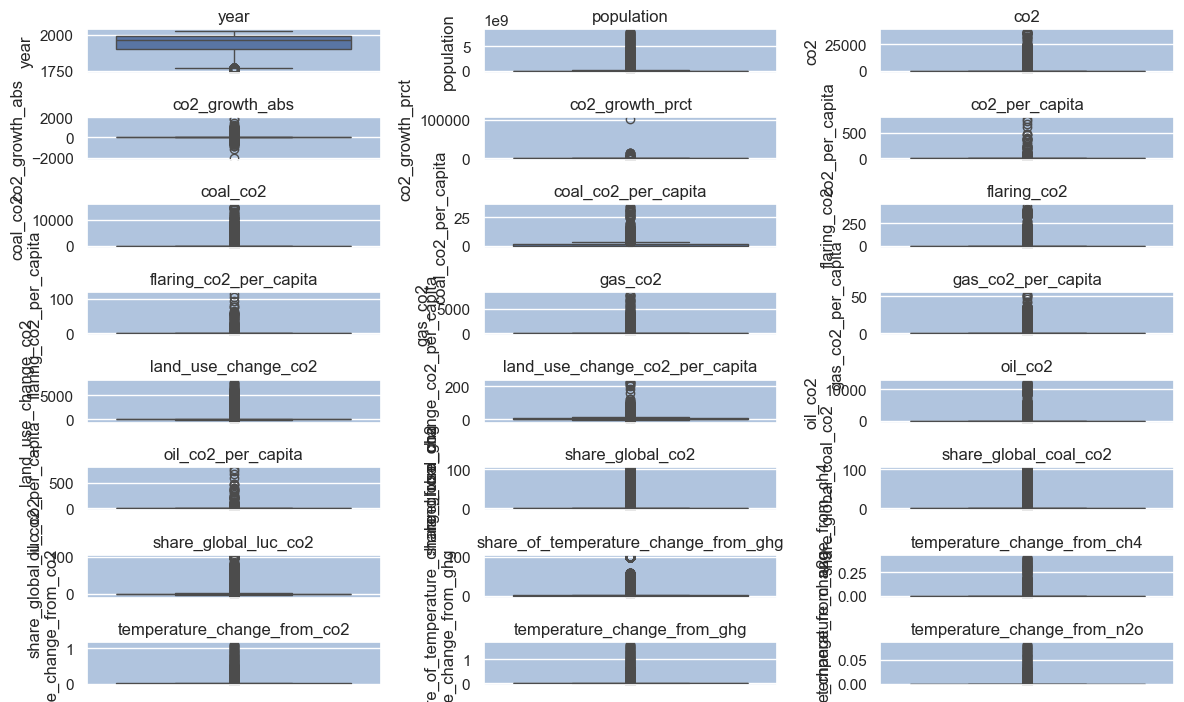

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(12, 8))

# Sélectionner uniquement les attributs numériques ayant moins de 25% de valeurs manquantes
numeric_columns = [col for col in attributes_below_25_missing_df['Attribute'] if data_cleaned[col].dtype in ['float64', 'int64']]

# Créer un boxplot pour chaque attribut numérique
for i, col in enumerate(numeric_columns, start=1):
    # S'assurer que le nombre de sous-plots corresponde au nombre de colonnes numériques
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Nous remarquons dans ces figures que, à part l'attribut "year", tous les autres attributs présentent des boxplots non clairs et pas du tout indicatifs de la distribution des valeurs. En effet, ces allures peuvent s'expliquer par les larges gammes de valeurs. Certains attributs comme "population" et "temperature" présentent des parfois des milliers de valeurs de part leur nature (par exemple : populations des pays changeant de 1750 à 2022 pour 270 pays différents) peuvent avoir une large gamme de valeurs, ce qui peut entraîner un affichage où la boîte (représentant le premier quartile, la médiane et le troisième quartile) semble très petite ou même parfois difficile à distinguer, avec des valeurs extrêmes ou des valeurs aberrantes s'étendant loin de la boîte principale.

Nous allons donc dans la prochaine partie trouver une solution pour avoir une vision beaucoup plus claire des boxplots en questions. Pour cela, nous proposons une transformation logarithmique  qui peut être utilisée sur les données que nous traitons. Cette méthode est adaptée dans ce cas car ces attributs ne présentent pas de valeurs nulles ou négatives (population et températures) et à travers son aspect mathématique, elle permet d'espacer les valeurs numériques des attributs.

c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getat

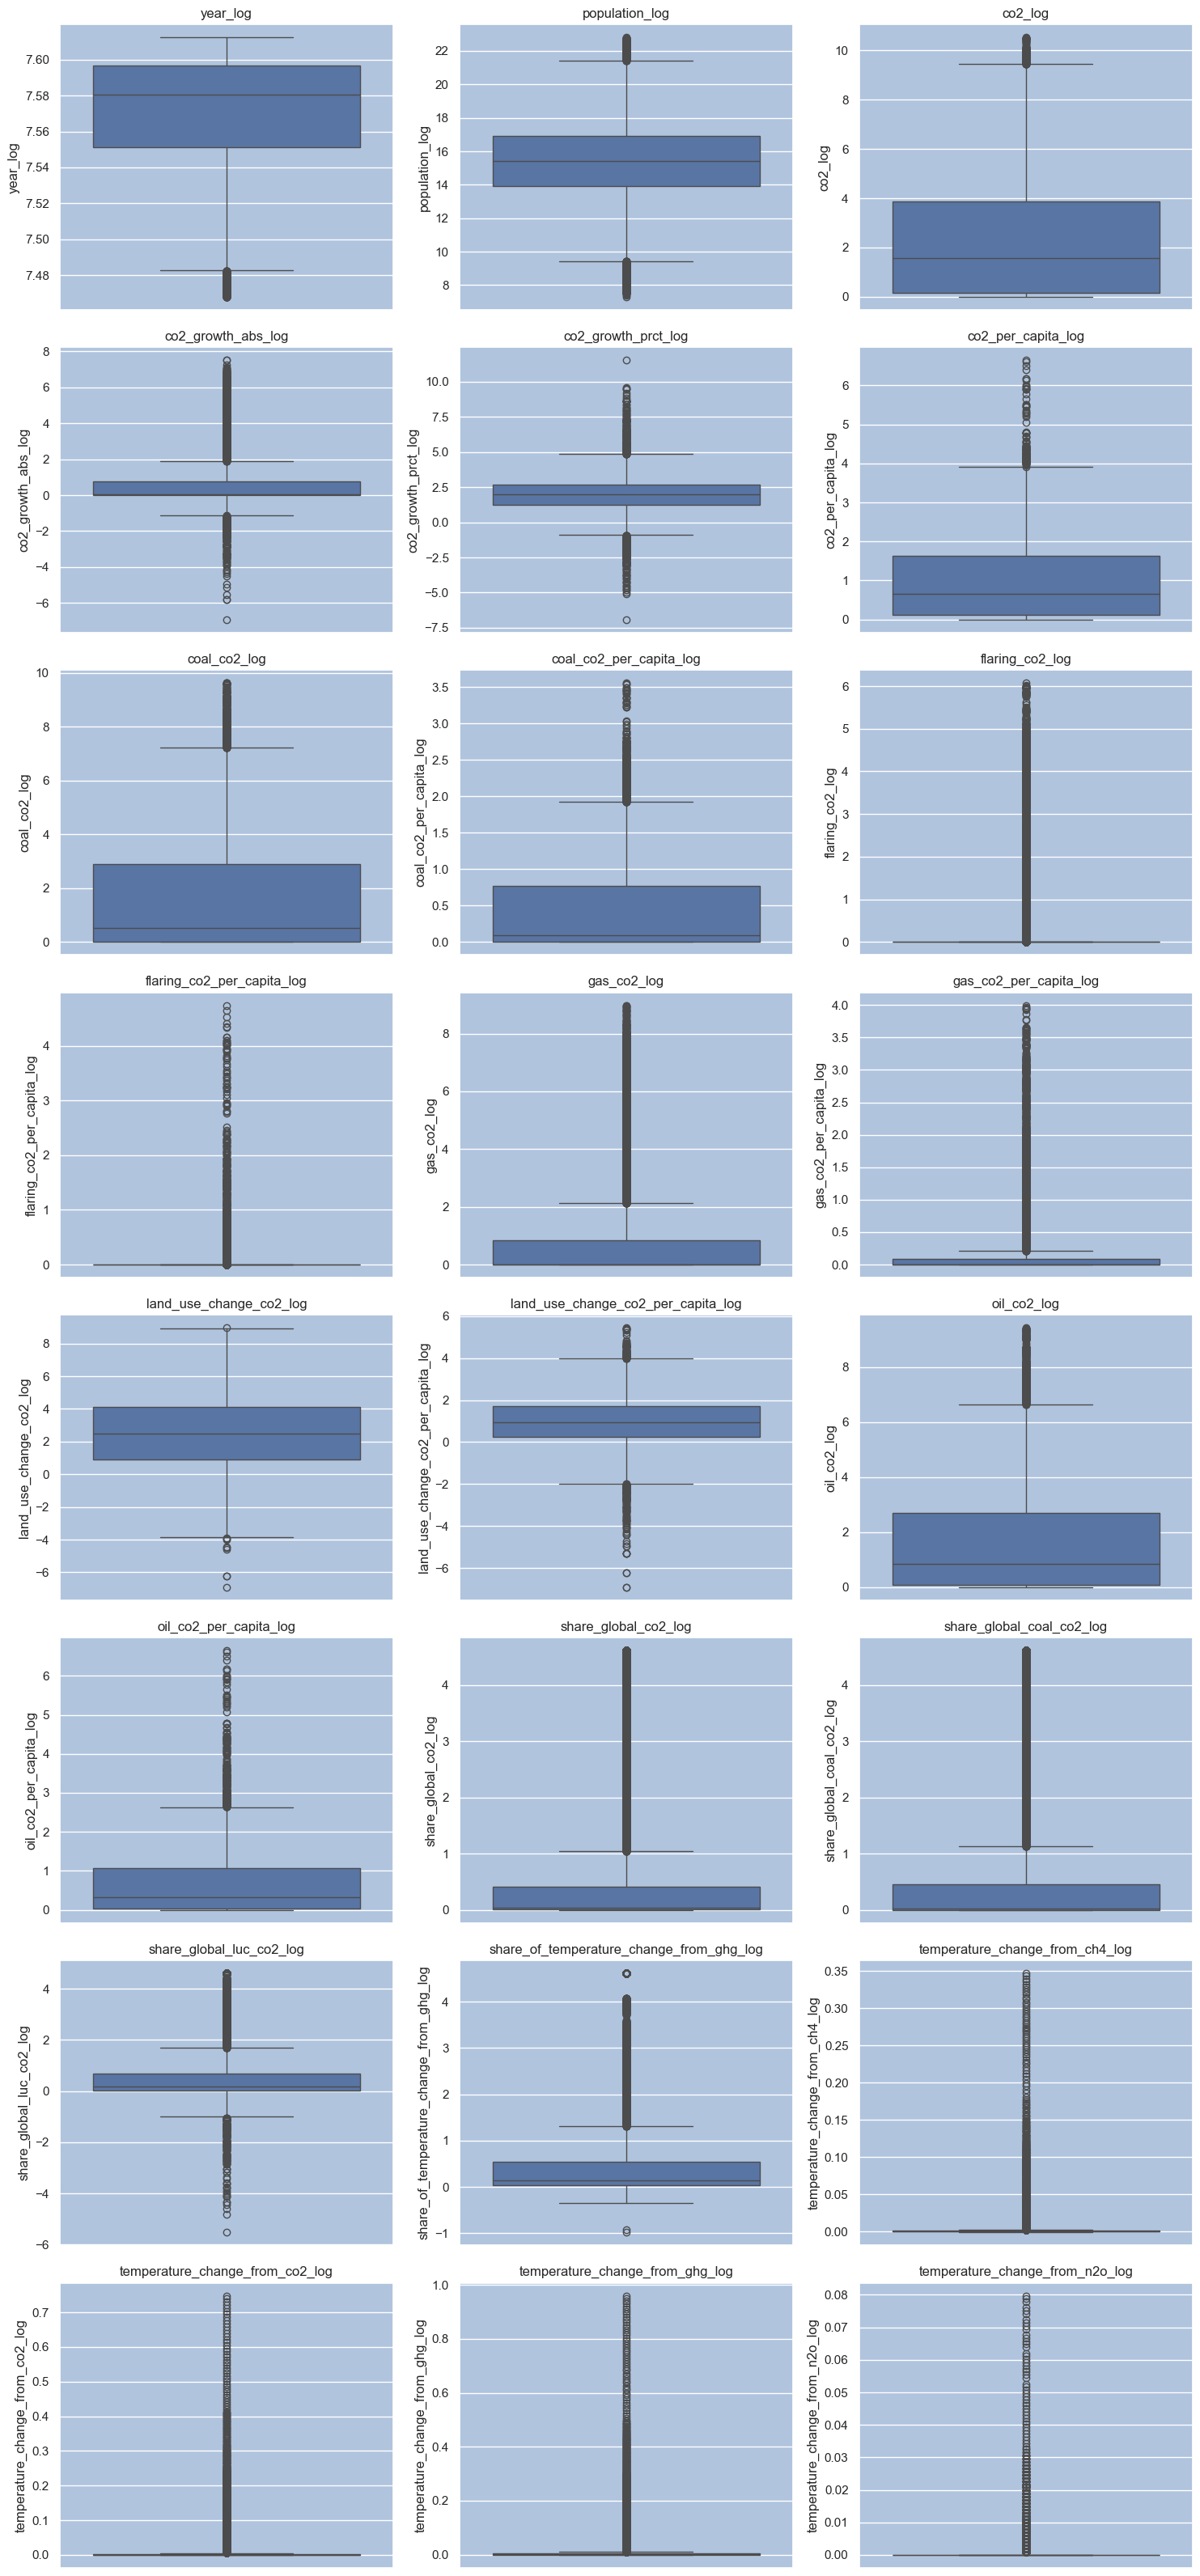

In [25]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les attributs numériques ayant moins de 25% de valeurs manquantes
numeric_columns = [col for col in attributes_below_25_missing_df['Attribute'] if data_cleaned[col].dtype in ['float64', 'int64']]

# Appliquer une transformation log sur les colonnes sélectionnées, en ajoutant 1 pour éviter le log de zéro
for col in numeric_columns:
    data_cleaned[col + '_log'] = np.log(data_cleaned[col] + 1)

# Calculer le nombre de subplots nécessaire
n_plots = len(numeric_columns)
n_cols = 3  # Vous pouvez ajuster ce nombre selon votre préférence
n_rows = math.ceil(n_plots / n_cols)  # Calculer le nombre de lignes nécessaire

# Générer des boxplots pour les versions transformées des colonnes
plt.figure(figsize=(15, n_rows * 4))  # Ajuster la taille de la figure en fonction du nombre de lignes

for i, col in enumerate([col + '_log' for col in numeric_columns], start=1):
    plt.subplot(n_rows, n_cols, i)  # Utiliser le nombre calculé de lignes et de colonnes
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Après avoir appliqué la transformation logarithmique et visualisé les données sous forme de boxplots, nous pouvons observer plusieurs points intéressants concernant la distribution de vos données :

- Amélioration de la Visibilité : La transformation logarithmique semble avoir aidé à améliorer la visibilité de la distribution des données pour plusieurs attributs. Les échelles sont maintenant plus maniables, et il est plus facile de discerner les quartiles et les médianes.

- Présence de Valeurs Aberrantes : Les boxplots révèlent la présence de valeurs aberrantes dans plusieurs attributs. Ces valeurs sont représentées par des points situés en dehors de la portée des "whiskers". La transformation logarithmique n'élimine pas les valeurs aberrantes mais peut aider à mieux les visualiser en rapport avec la distribution générale.

    Observations et Méthodes d'Imputation :
1. Attributs avec Distribution Symétrique et Peu de Valeurs Aberrantes
Distribution : Ces attributs semblent avoir une distribution relativement symétrique autour de la médiane, avec peu de valeurs aberrantes.
Imputation recommandée : Pour ces attributs, l'imputation par la moyenne ou la médiane peut être appropriée. La médiane est souvent privilégiée car elle est moins sensible aux valeurs aberrantes.

2. Attributs avec Distribution Asymétrique et Valeurs Aberrantes Significatives 
Ces attributs montrent une asymétrie notable, avec une queue longue indiquant la présence de valeurs aberrantes significatives.
Pour ces attributs, l'imputation par la médiane ou par k-plus proches voisins (k-NN) peut être plus appropriée. L'imputation k-NN peut être particulièrement utile car elle prend en compte la similarité entre les instances.

3. Attributs avec Nombre Élevé de Valeurs Aberrantes 
Ces attributs présentent un grand nombre de valeurs aberrantes, comme indiqué par de nombreux points situés en dehors des "whiskers" des boxplots.
L'imputation par k-NN ou par régression peut être préférable pour ces attributs, car ces méthodes permettent une imputation plus ciblée basée sur les caractéristiques des données. L'imputation par régression, en particulier, peut être utile si les valeurs manquantes sont présumées avoir des relations linéaires ou polynomiales avec d'autres attributs.

In [26]:
from sklearn.impute import SimpleImputer

# Remplacer les infinis par NaN
data_cleaned = data_cleaned.replace([np.inf, -np.inf], np.nan)

# Imputation par la médiane
imputer = SimpleImputer(strategy='median')

# Les colonnes à imputer
columns_to_impute_median = ['year_log']

# Appliquer l'imputation
data_cleaned[columns_to_impute_median] = imputer.fit_transform(data_cleaned[columns_to_impute_median])

# Vérifier si l'imputation a réussi
print(data_cleaned[columns_to_impute_median].isnull().sum())

year_log    0
dtype: int64


In [27]:
data_cleaned = data_cleaned.drop(columns= ['year'])

Pour le reste des attributs, nous allons les imputer par la méthode de régression linéaire. En effet, ils présentent des distributions symétriques avec un nombre significatif de valeurs aberrantes. Et, cette méthode permet une imputation plus ciblée basée sur les caractéristiques des données. Elle est utile car les valeurs manquantes ont des relations linéaires ou polynomiales avec d'autres attributs.

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Créer un imputeur itératif
iterative_imputer = IterativeImputer()

columns_to_impute_iterative = ['population_log', 'land_use_change_co2_log', 'share_global_luc_co2_log', 'share_of_temperature_change_from_ghg_log']

# Appliquer l'imputation
data_cleaned[columns_to_impute_iterative] = iterative_imputer.fit_transform(data_cleaned[columns_to_impute_iterative])

print(data_cleaned[columns_to_impute_iterative].isnull().sum())

population_log                              0
land_use_change_co2_log                     0
share_global_luc_co2_log                    0
share_of_temperature_change_from_ghg_log    0
dtype: int64


c:\Users\tasli\OneDrive\Usherbrooke\Forage_IFT-870\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cependant, cette transformation avec le log n'a pas pu corriger la visualisation de tous les attributs (voir les 4 derniers attributs). Nous allons donc faire un lissage de ces attributs pour avoir une représentation plus claire.

In [29]:
# Identifier les 4 derniers attributs numériques
last_four_columns = numeric_columns[-4:]

Nous allons supprimer les nouvelles colonnes générées pour les 4 dernières colonnes puisque la transformation logarithmique n'a pas marché pour eux.

In [30]:
# Supprimer les colonnes transformées par logarithme des 4 derniers attributs numériques
for col in numeric_columns[-4:]:
    if col + '_log' in data_cleaned.columns:
        data_cleaned.drop(col + '_log', axis=1, inplace=True)

Nous allons utiliser la méthode de lissage de données par régression linéaire de degré 2 (assez simple à implémenter). Nous allons appliquer cette méthode aux 4 attributs en question pour voir s'il est possible d'améliorer leurs visualisations.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Créer une variable indépendante (par exemple, un index)
x = np.arange(len(data_cleaned)).reshape(-1, 1)

for col in numeric_columns[-4:]:
    # Préparer la variable dépendante, en ignorant les valeurs NaN pour l'ajustement
    y = data_cleaned[col].dropna().values.reshape(-1, 1)
    x_filtered = x[data_cleaned[col].dropna().index]
    
    # Ajuster une régression polynomiale de degré 2
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_filtered)
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # Utiliser le modèle pour prédire sur l'ensemble du domaine x
    y_smooth = model.predict(poly.transform(x))
    
    # Stocker les résultats lissés dans une nouvelle colonne
    data_cleaned[col + '_smooth'] = y_smooth.flatten()

IndexError: index 30422 is out of bounds for axis 0 with size 30308

Nous allons visualiser les boxplots des attributs nouvellement transformés.

KeyError: 'temperature_change_from_ch4_smooth'

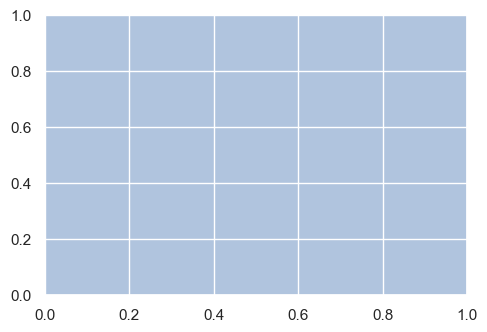

In [ ]:
plt.figure(figsize=(12, 8))

# Sélectionner les noms des colonnes lissées
smoothed_columns = [col + '_smooth' for col in numeric_columns[-4:]]

for i, col in enumerate(smoothed_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'Boxplot de {col} après lissage')

plt.tight_layout()
plt.show()

Nous remarquons que après lissage, nous arrivons à mieux visualiser les distributions de données des 4 attributs. Tout de même, ces attributs présentent des distributions asymétriques. 3 de ces attributs présentent un nombre limité de valeurs aberrantes. Ces attributs sont plutôt informatives et temporelles. On va donc les imputer par interpolation. L'imputation par interpolation est une technique couramment utilisée pour traiter les valeurs manquantes dans les séries temporelles, comme les données de température. L'idée de base est d'estimer les valeurs manquantes en se basant sur les valeurs existantes avant et après les points manquants.

In [ ]:
# Les colonnes à interpoler 
columns_to_impute_interpolation = [
    'temperature_change_from_ghg_smooth', 
    'temperature_change_from_n2o_smooth', 
    'temperature_change_from_ch4_smooth', 
    'temperature_change_from_co2_smooth'
]

# Appliquer l'interpolation polynomiale de degré 2 pour imputer les valeurs manquantes des températures.
data_cleaned[columns_to_impute_interpolation] = data_cleaned[columns_to_impute_interpolation].interpolate(method='polynomial', order=2)

# Afficher le nombre de valeurs manquantes après l'imputation pour chaque colonne
print(data_cleaned[columns_to_impute_interpolation].isnull().sum())

In [ ]:
data_cleaned.columns

In [ ]:
# Supression des attributs initiaux qui n'ont pas été lissés
data_cleaned = data_cleaned.drop(columns=['temperature_change_from_ch4', 'temperature_change_from_co2', 'temperature_change_from_ghg', 'temperature_change_from_n2o'])

### Attributs ayant plus de 25% de valeurs manquantes

In [ ]:
# Filtrer les attributs avec plus de 25% de valeurs manquantes
attributes_above_25_missing = missing_values_percentage_cleaned[missing_values_percentage_cleaned > 25]
attributes_above_25_missing_df = attributes_above_25_missing.reset_index()
attributes_above_25_missing_df.columns = ['Attribute', '% of Missing Values']
attributes_above_25_missing_df

Nous avons décidé de supprimer les variables de cumulatif parce qu'ils donnent des cumulatifs ou plutôt des statistiques sur les autres variables et nous pourrons extraire les éventuelles liaisons entre ces variables ultérieurement (puisque nous allons les imputer dans cette étape et ça sera incohérent de le faire 2 fois). De plus, ces variables présentent un grand pourcentage de valeurs manquantes (NAs) ce qui peut compliquer la modélisation.

In [ ]:
# Identifier toutes les colonnes qui contiennent le mot "cumulative"
cum_columns_to_drop = [col for col in data_cleaned.columns if 'cumulative' in col]

# Supprimer ces colonnes du DataFrame
data_cleaned = data_cleaned.drop(columns=cum_columns_to_drop)

# Afficher les colonnes restantes pour vérification
print(data_cleaned.columns)

Puisque nous allons prédire la variable "co2", nous nous pouvons pas avoir de valeurs manquantes pour cet attribut. Et nous ne prenons pas le risque d'imputer cette  variable, car cela peut introduire des erreurs dans l'entraînement de notre modèle. Et, il faut aussi prendre en compte le fait que les méthodes d'imputation, bien que très performantes, peuvent introduire des biais.

In [ ]:
data_cleaned.shape

In [ ]:
data_cleaned['co2'].isnull().sum()

Nous gardons tout de même un ensemble assez grand d'échantillons pour l'entraînement et le test.